In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from surprise import SVD, Reader, Dataset

warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [9]:
fig = px.pie(df, names = 'HeartDisease', title = 'Ratio of Respondents with Heart Disease', width=500)
fig.update_traces(textinfo = "percent+label")
fig.show()

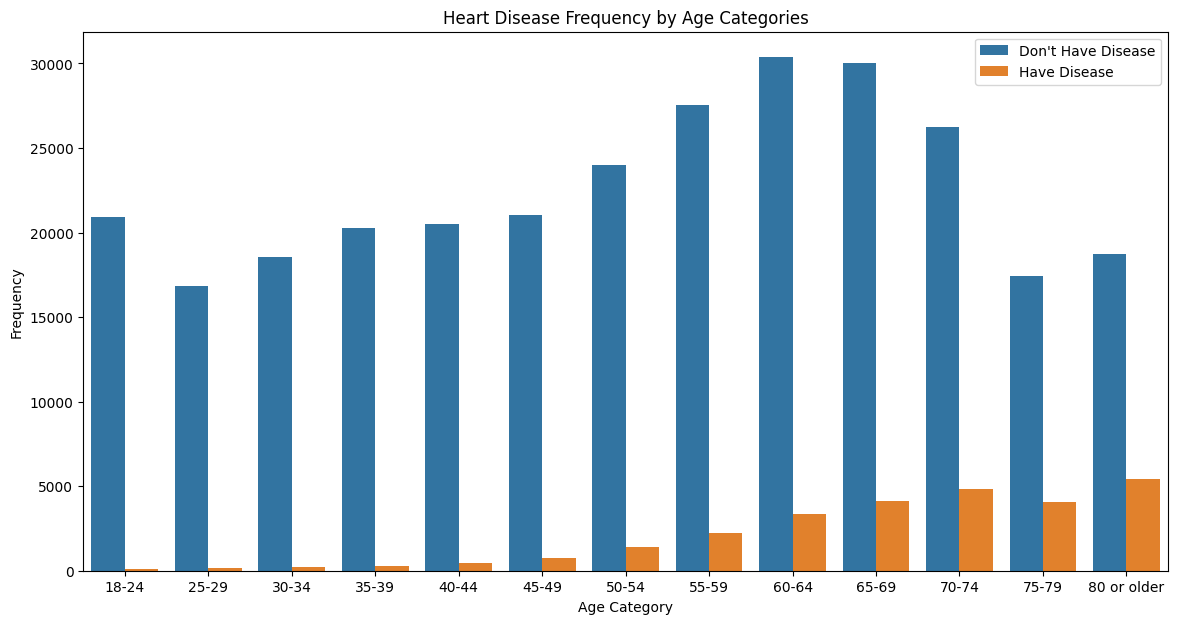

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease', order=np.unique(df['AgeCategory'].values))
plt.title('Heart Disease Frequency by Age Categories')
plt.xlabel('Age Category')
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [11]:
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
df = df.rename(columns={"KidneyDisease": "Kidney Disease", "Diabetic": "Diabetes", "SkinCancer": "Skin Cancer"})

cols = ['Kidney Disease','Diabetes' ,'Stroke' ,'Asthma','Skin Cancer']
for i in cols :
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    
    fig.add_trace(go.Pie(values = df_no.HeartDisease.value_counts().values, labels = ['No Hearth Disease','Hearth Disease'],
        marker_colors=irises_colors),row=1,col=1)
    fig.add_trace(go.Pie(values = df_yes.HeartDisease.value_counts().values, labels = ['No Hearth Disease','Hearth Disease'],
        marker_colors=irises_colors),row=1,col=2)
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {i}',x=0.15, y=1.10, font_size=30),
                                  dict(text=f'With {i}',x=0.80, y=1.10, font_size=30)],)
    
    fig.show()

In [12]:
df = df.rename(columns={"AlcoholDrinking": "Alcohol Consumption", "PhysicalActivity": "Physical Activity"})

cols = ['Smoking','Alcohol Consumption','Physical Activity']
for i in cols :
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    
    fig.add_trace(go.Pie(values = df_no.HeartDisease.value_counts().values, labels = ['No Hearth Disease','Hearth Disease'],
        marker_colors=irises_colors),row=1,col=1)
    fig.add_trace(go.Pie(values = df_yes.HeartDisease.value_counts().values, labels = ['No Hearth Disease','Hearth Disease'],
        marker_colors=irises_colors),row=1,col=2)
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {i}',x=0.15, y=1.10, font_size=30),
                                  dict(text=f'With {i}',x=0.80, y=1.10, font_size=30)],)
    
    fig.show()


# Models

In [24]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
df[object_columns] = df[object_columns].apply(le.fit_transform)

In [25]:
# label_encoder object knows how to understand word labels.
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
df = pd.read_csv('heart_2020_cleaned.csv')
# Encode labels in column 'species'.
df['HeartDisease']= label_encoder.fit_transform(df['HeartDisease'])
df['Smoking']= label_encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking']= label_encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke']= label_encoder.fit_transform(df['Stroke'])
df['DiffWalking']= label_encoder.fit_transform(df['DiffWalking'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Asthma']= label_encoder.fit_transform(df['Asthma'])
df['KidneyDisease']= label_encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer']= label_encoder.fit_transform(df['SkinCancer'])
df['AgeCategory']= label_encoder.fit_transform(df['AgeCategory'])
df['Race']= label_encoder.fit_transform(df['Race'])
df['Diabetic']= label_encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity']= label_encoder.fit_transform(df['PhysicalActivity'])
df['GenHealth']= label_encoder.fit_transform(df['GenHealth'])

df = df
X, y = df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease']

In [26]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
df[object_columns] = df[object_columns].apply(le.fit_transform)


In [27]:
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

results = []

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append(('LogisticRegression (all features)', accuracy, precision, recall, f1))

model = LogisticRegression()
X_d, y_d = df[['Diabetic', 'Asthma', 'SkinCancer', 'KidneyDisease']], df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append(('Logistic Regression (other diseases/conditions)', accuracy, precision, recall, f1))

model = LogisticRegression()
X_d, y_d = df[['BMI', 'AgeCategory', 'Sex']], df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append(('Logistic Regression (BMI, age category, and sex)', accuracy, precision, recall, f1))

df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
display(df_styled)


In [18]:
results = []

In [19]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


def evaluate_models(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    models = [
        ('Random Forest', RandomForestClassifier()),
        ('Naive Bayes', GaussianNB())
    ]

    for name, model in models:
        if name == 'XGBoost':
            xgb_cl = XGBClassifier()
            model = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [21]:
evaluate_models(X_ovsampled, y_ovsampled)

In [22]:
import xgboost


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.40)


# XGBoost classifier
xgb_cl = xgboost.XGBClassifier()

# The baggging ensemble classifier is initialized with:
bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Fit the model
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
results.append(('XGBoost', accuracy, precision, recall, f1))

df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
display(df_styled)

Train score: 0.9141220677830069
Test score: 0.914828249347238
